# Titanic Survival Prediction with Neural Network

This notebook implements a neural network from scratch to predict passenger survival in the Titanic disaster, without using frameworks like PyTorch or TensorFlow.

## Table of Contents
1. Data Loading
2. Data Exploration
3. Data Preprocessing
4. Neural Network Implementation
5. Training and Evaluation
6. Results and Visualization

## 1. Data Loading

First, let's import the necessary libraries and load the Titanic dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
try:
    df_train = pd.read_csv('train.csv')
    df_test = pd.read_csv('test.csv')
    print("Data loaded successfully!")
    print(f"Training data shape: {df_train.shape}")
    print(f"Test data shape: {df_test.shape}")
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")

# Display first few rows of each dataset
print("\nTraining data sample:")
display(df_train.head())
print("\nTest data sample:")
display(df_test.head())

Data loaded successfully!
Training data shape: (891, 12)
Test data shape: (418, 11)

Training data sample:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Test data sample:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Data Exploration

Let's explore the data to understand its structure, missing values, and feature distributions.

In [2]:
# Check basic information about the training data
print("Training data info:")
df_train.info()

# Check numerical statistics
print("\nTraining data statistics:")
display(df_train.describe())

# Check distribution of target variable
print("\nSurvival distribution:")
display(df_train['Survived'].value_counts())
print(f"Survival rate: {df_train['Survived'].mean():.4f}")

# Check missing values
print("\nMissing values in training data:")
display(df_train.isnull().sum())

print("\nMissing values in test data:")
display(df_test.isnull().sum())

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Training data statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Survival distribution:


Survived
0    549
1    342
Name: count, dtype: int64

Survival rate: 0.3838

Missing values in training data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Missing values in test data:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

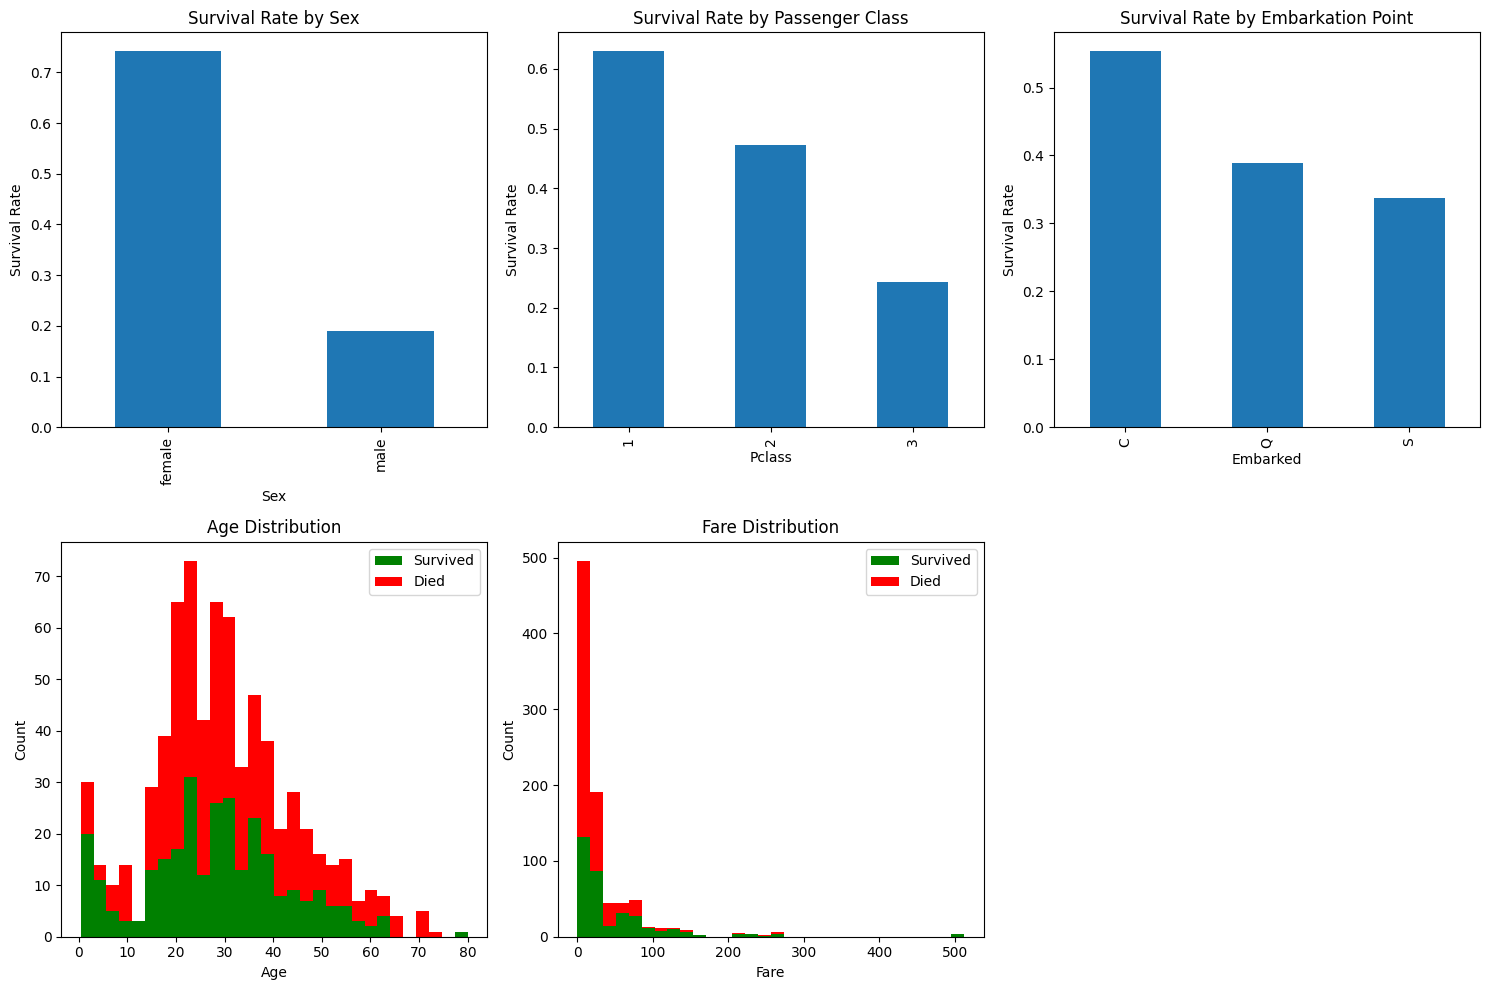

In [3]:
# Visualize some relationships with survival
plt.figure(figsize=(15, 10))

# Survival by Sex
plt.subplot(2, 3, 1)
df_train.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')

# Survival by Pclass
plt.subplot(2, 3, 2)
df_train.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')

# Survival by Embarked
plt.subplot(2, 3, 3)
df_train.groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate')

# Age distribution
plt.subplot(2, 3, 4)
plt.hist([df_train[df_train['Survived']==1]['Age'].dropna(), 
         df_train[df_train['Survived']==0]['Age'].dropna()], 
         bins=30, stacked=True, color=['g','r'], 
         label=['Survived', 'Died'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Fare distribution
plt.subplot(2, 3, 5)
plt.hist([df_train[df_train['Survived']==1]['Fare'].dropna(), 
         df_train[df_train['Survived']==0]['Fare'].dropna()], 
         bins=30, stacked=True, color=['g','r'], 
         label=['Survived', 'Died'])
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

## 3. Data Preprocessing

Based on our exploration, we'll preprocess the data:
1. Handle missing values
2. Convert categorical features to numerical
3. Drop unnecessary columns
4. Scale numerical features

In [4]:
def preprocess_data(df_train, df_test):
    # Create copies to avoid modifying originals
    train = df_train.copy()
    test = df_test.copy()
    
    # Fill missing Age values with median
    age_median = train['Age'].median()
    train = train.assign(Age=train['Age'].fillna(age_median))
    test = test.assign(Age=test['Age'].fillna(age_median))
    
    # Fill missing Embarked values with most common value
    embarked_mode = train['Embarked'].mode()[0]
    train = train.assign(Embarked=train['Embarked'].fillna(embarked_mode))
    test = test.assign(Embarked=test['Embarked'].fillna(embarked_mode))
    
    # Fill missing Fare values with median
    fare_median = train['Fare'].median()
    train = train.assign(Fare=train['Fare'].fillna(fare_median))
    test = test.assign(Fare=test['Fare'].fillna(fare_median))
    
    # Drop Cabin column due to too many missing values
    train = train.drop('Cabin', axis=1)
    test = test.drop('Cabin', axis=1)
    
    # Convert categorical features to numerical
    # Sex: male=0, female=1
    train = train.assign(Sex=train['Sex'].map({'male': 0, 'female': 1}))
    test = test.assign(Sex=test['Sex'].map({'male': 0, 'female': 1}))
    
    # Embarked: One-hot encode
    train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked', drop_first=True)
    test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked', drop_first=True)
    
    # Make sure test has the same columns as train (for one-hot encoded features)
    for col in train.columns:
        if col not in test.columns and col != 'Survived':
            test[col] = 0
            
    # Make sure test columns are in the same order as train
    test_cols = [col for col in train.columns if col != 'Survived']
    test = test[test_cols]
    
    # Save PassengerId for submission
    test_passenger_ids = test['PassengerId'].copy()
    
    # Drop unnecessary columns
    train = train.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
    test = test.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
    
    # Feature scaling using Min-Max normalization
    features_to_scale = ['Age', 'Fare', 'SibSp', 'Parch']
    
    for feature in features_to_scale:
        min_val = train[feature].min()
        max_val = train[feature].max()
        # Avoid division by zero
        if max_val > min_val:
            train = train.assign(**{feature: (train[feature] - min_val) / (max_val - min_val)})
            test = test.assign(**{feature: (test[feature] - min_val) / (max_val - min_val)})
        
    # Extract features and target
    X_train = train.drop('Survived', axis=1).values.astype(np.float64)
    y_train = train['Survived'].values.reshape(-1, 1).astype(np.float64)
    X_test = test.values.astype(np.float64)
    
    return X_train, y_train, X_test, test_passenger_ids

## 4. Neural Network Implementation

Let's build our neural network from scratch, with forward and backward propagation, using only NumPy.

In [5]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size=1, learning_rate=0.01):
        """
        Initialize the Neural Network with random weights and biases
        """
        # Initialize weights and biases with small random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        
        # Initialize arrays to store metrics
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        
    def sigmoid(self, x):
        """Sigmoid activation function"""
        # Make sure x is a numpy array
        x = np.array(x, dtype=np.float64)
        # Use np.clip to avoid overflow
        x_clipped = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x_clipped))
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        # Make sure x is a numpy array
        x = np.array(x, dtype=np.float64)
        sigmoid_x = self.sigmoid(x)
        return sigmoid_x * (1 - sigmoid_x)
        
    def forward(self, X):
        """Forward propagation"""
        # Ensure X is a numpy array
        X = np.array(X, dtype=np.float64)
        
        # First layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        
        # Output layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        
        return self.A2
        
    def compute_loss(self, y_true, y_pred):
        """Binary cross-entropy loss"""
        # Make sure inputs are numpy arrays
        y_true = np.array(y_true, dtype=np.float64)
        y_pred = np.array(y_pred, dtype=np.float64)
        
        m = y_true.shape[0]
        # Avoid log(0) by adding small epsilon
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
        
    def backward(self, X, y):
        """Backward propagation to update weights and biases"""
        # Make sure inputs are numpy arrays
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        
        m = X.shape[0]
        
        # Output layer gradients
        dZ2 = self.A2 - y
        dW2 = 1/m * np.dot(self.A1.T, dZ2)
        db2 = 1/m * np.sum(dZ2, axis=0, keepdims=True)
        
        # Hidden layer gradients
        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.Z1)
        dW1 = 1/m * np.dot(X.T, dZ1)
        db1 = 1/m * np.sum(dZ1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
    
    def train(self, X, y, epochs=1000, batch_size=32, validation_data=None):
        """Train the neural network"""
        # Make sure inputs are numpy arrays
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        
        m = X.shape[0]
        
        for epoch in range(epochs):
            # Shuffle data
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            
            # Mini-batch training
            for i in range(0, m, batch_size):
                end = min(i + batch_size, m)
                X_batch = X_shuffled[i:end]
                y_batch = y_shuffled[i:end]
                
                # Forward and backward pass
                self.forward(X_batch)
                self.backward(X_batch, y_batch)
            
            # Compute metrics after each epoch
            y_pred_train = self.predict(X)
            train_loss = self.compute_loss(y, y_pred_train)
            train_accuracy = np.mean((y_pred_train > 0.5) == y)
            
            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)
            
            # Validation if available
            if validation_data is not None:
                X_val, y_val = validation_data
                # Make sure validation data is numpy arrays
                X_val = np.array(X_val, dtype=np.float64)
                y_val = np.array(y_val, dtype=np.float64)
                
                y_pred_val = self.predict(X_val)
                val_loss = self.compute_loss(y_val, y_pred_val)
                val_accuracy = np.mean((y_pred_val > 0.5) == y_val)
                
                self.val_losses.append(val_loss)
                self.val_accuracies.append(val_accuracy)
                
                if (epoch + 1) % 100 == 0:
                    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
            else:
                if (epoch + 1) % 100 == 0:
                    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}")
    
    def predict(self, X):
        """Make predictions"""
        # Make sure X is a numpy array
        X = np.array(X, dtype=np.float64)
        return self.forward(X)
    
    def predict_classes(self, X):
        """Convert predictions to classes (0 or 1)"""
        # Make sure X is a numpy array
        X = np.array(X, dtype=np.float64)
        return (self.predict(X) > 0.5).astype(int)

## 5. Train and Evaluation

To train and evaluate the neural network, we can use the following code:



In [6]:
def train_and_evaluate(X_train, y_train, X_test, test_passenger_ids):
    """Train the neural network and evaluate its performance"""
    # Ensure data is the right type
    X_train = np.array(X_train, dtype=np.float64)
    y_train = np.array(y_train, dtype=np.float64)
    X_test = np.array(X_test, dtype=np.float64)

    # Split train data into training and validation sets
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    # Initialize the neural network
    input_size = X_train.shape[1]
    hidden_size = 16  # You can experiment with this value
    nn = NeuralNetwork(input_size=input_size, hidden_size=hidden_size, learning_rate=0.01)
    
    # Train the network
    nn.train(X_train_split, y_train_split, epochs=1000, batch_size=32, validation_data=(X_val, y_val))
    
    # Evaluate on validation set
    val_predictions = nn.predict(X_val)
    val_accuracy = np.mean((val_predictions > 0.5) == y_val)
    print(f"Final validation accuracy: {val_accuracy:.4f}")
    
    # Make predictions on test set
    test_predictions = nn.predict_classes(X_test)
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'PassengerId': test_passenger_ids,
        'Survived': test_predictions.flatten()
    })
    
    # Save predictions to CSV
    submission.to_csv('predictions.csv', index=False)
    print("Predictions saved to 'predictions.csv'")
    
    # Plot training history
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(nn.train_losses, label='Training Loss')
    if hasattr(nn, 'val_losses') and len(nn.val_losses) > 0:
        plt.plot(nn.val_losses, label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(nn.train_accuracies, label='Training Accuracy')
    if hasattr(nn, 'val_accuracies') and len(nn.val_accuracies) > 0:
        plt.plot(nn.val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return nn

## 6.Execute the Pipeline

Data preprocessing completed!
X_train shape: (891, 8)
y_train shape: (891, 1)
X_test shape: (418, 8)
Epoch 100/1000, Train Loss: 0.6599, Train Acc: 0.6236, Val Loss: 0.6790, Val Acc: 0.5866
Epoch 200/1000, Train Loss: 0.6551, Train Acc: 0.6236, Val Loss: 0.6736, Val Acc: 0.5866
Epoch 300/1000, Train Loss: 0.6428, Train Acc: 0.6236, Val Loss: 0.6587, Val Acc: 0.5866
Epoch 400/1000, Train Loss: 0.6093, Train Acc: 0.6236, Val Loss: 0.6198, Val Acc: 0.5866
Epoch 500/1000, Train Loss: 0.5438, Train Acc: 0.7921, Val Loss: 0.5439, Val Acc: 0.7654
Epoch 600/1000, Train Loss: 0.4881, Train Acc: 0.8132, Val Loss: 0.4800, Val Acc: 0.7933
Epoch 700/1000, Train Loss: 0.4676, Train Acc: 0.7879, Val Loss: 0.4556, Val Acc: 0.7821
Epoch 800/1000, Train Loss: 0.4606, Train Acc: 0.7907, Val Loss: 0.4471, Val Acc: 0.7821
Epoch 900/1000, Train Loss: 0.4570, Train Acc: 0.7907, Val Loss: 0.4421, Val Acc: 0.7821
Epoch 1000/1000, Train Loss: 0.4545, Train Acc: 0.7893, Val Loss: 0.4390, Val Acc: 0.7821
Final va

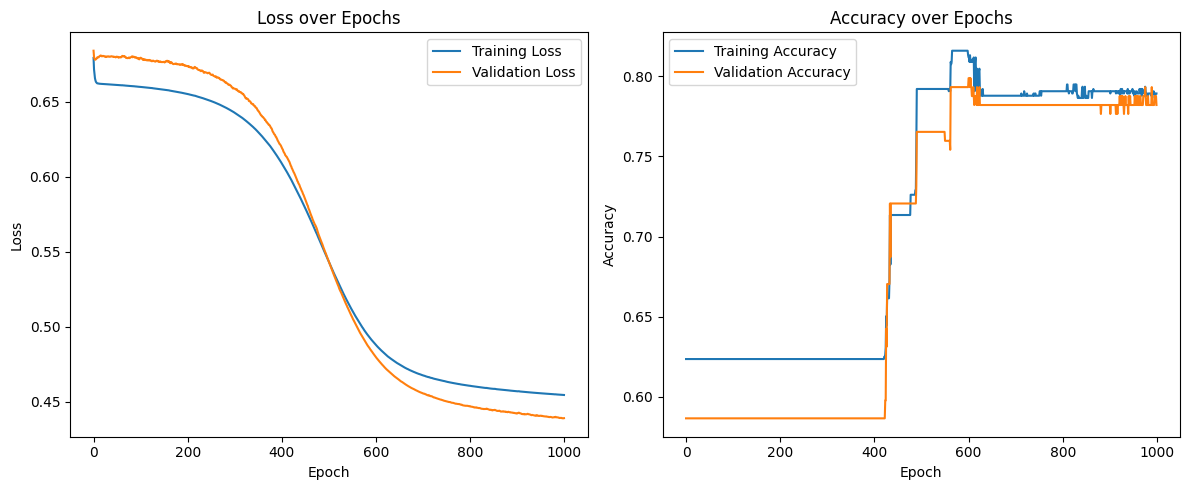

In [7]:
# Preprocess the data
X_train, y_train, X_test, test_passenger_ids = preprocess_data(df_train, df_test)
print("Data preprocessing completed!")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

# For faster testing, you can reduce the number of epochs
# Train and evaluate the model
model = train_and_evaluate(X_train, y_train, X_test, test_passenger_ids)